<a href="https://colab.research.google.com/github/Hitika-Jain/ParkInsight/blob/main/regionbased_mrimodels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nilearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 48.0 MB/s eta 0:00:00


In [ ]:
import numpy as np
import nibabel as nib
from nilearn import datasets
from nilearn.image import resample_to_img
from scipy.ndimage import zoom
import os

# CONFIGURATION
npy_file_path = "/content/drive/MyDrive/3D_Numpy_Volumes/hc/hc_176347.npy"  # Change this
output_dir = "/content/voxels"
label = 0  # 0 for healthy, 1 for Parkinson's

region_names = ['Left_Caudate', 'Left_Putamen', 'Brain_Stem', 'Right_White_Matter']
regions_to_extract = [5, 6, 8, 12]  # IDs from Harvard-Oxford atlas

# Create output directories
for region in region_names:
    os.makedirs(os.path.join(output_dir, region), exist_ok=True)

# Load the brain volume (3D)
brain_data = np.load(npy_file_path)

# Convert to Nifti1Image with identity affine
brain_img = nib.Nifti1Image(brain_data, affine=np.eye(4))

# Load atlas
atlas = datasets.fetch_atlas_harvard_oxford('sub-maxprob-thr50-1mm')
atlas_img = nib.load(atlas.filename)
atlas_data = atlas_img.get_fdata()
atlas_affine = atlas_img.affine

# Function to extract, resize, and save voxel region
def extract_and_save(region_idx, region_name):
    region_mask = atlas_data == region_idx
    region_mask_img = nib.Nifti1Image(region_mask.astype(np.float32), affine=atlas_affine)

    # Resample mask to brain image space
    resampled_mask = resample_to_img(region_mask_img, brain_img, interpolation='nearest')
    mask_data = resampled_mask.get_fdata()

    # Apply mask
    masked_region = brain_data * mask_data

    # If region has any non-zero voxels
    if np.any(masked_region):
        x, y, z = np.where(masked_region != 0)
        xmin, xmax = x.min(), x.max()
        ymin, ymax = y.min(), y.max()
        zmin, zmax = z.min(), z.max()

        cropped = masked_region[xmin:xmax+1, ymin:ymax+1, zmin:zmax+1]

        # Resize to 32x32x32
        resized = zoom(cropped, (32 / cropped.shape[0], 32 / cropped.shape[1], 32 / cropped.shape[2]), order=1)

        # Save
        region_folder = os.path.join(output_dir, region_name)
        base_name = os.path.splitext(os.path.basename(npy_file_path))[0]
        save_path = os.path.join(region_folder, f"{base_name}_{label}.npy")
        np.save(save_path, resized)

        print(f"[✓] Saved: {save_path}")
    else:
        print(f"[x] Region {region_name} is empty, skipping.")

# Process each region
for idx, name in zip(regions_to_extract, region_names):
    extract_and_save(idx, name)

[_add_readme_to_default_data_locations] Added README.md to /root/nilearn_data

[get_dataset_dir] Dataset created in /root/nilearn_data/fsl

[fetch_single_file] Downloading data from https://www.nitrc.org/frs/download.php/9902/HarvardOxford.tgz ...

[_chunk_report_] Downloaded 18063360 of 25716861 bytes (70.2%%,    0.4s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[uncompress_file] Extracting data from /root/nilearn_data/fsl/a7fc85ee019a9a4f8a037cba0214db4f/HarvardOxford.tgz...

[uncompress_file] .. done.

<ipython-input-2-e2ec01e914ac>:38: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  resampled_mask = resample_to_img(region_mask_img, brain_img, interpolation='nearest')
/usr/local/lib/python3.11/dist-packages/nilearn/image/resampling.py:805: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  return resample_img(


[x] Region Left_Caudate is empty, skipping.


<ipython-input-2-e2ec01e914ac>:38: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  resampled_mask = resample_to_img(region_mask_img, brain_img, interpolation='nearest')
/usr/local/lib/python3.11/dist-packages/nilearn/image/resampling.py:805: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  return resample_img(


[x] Region Left_Putamen is empty, skipping.


<ipython-input-2-e2ec01e914ac>:38: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  resampled_mask = resample_to_img(region_mask_img, brain_img, interpolation='nearest')
/usr/local/lib/python3.11/dist-packages/nilearn/image/resampling.py:805: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  return resample_img(


[x] Region Brain_Stem is empty, skipping.


<ipython-input-2-e2ec01e914ac>:38: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  resampled_mask = resample_to_img(region_mask_img, brain_img, interpolation='nearest')
/usr/local/lib/python3.11/dist-packages/nilearn/image/resampling.py:805: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  return resample_img(


[✓] Saved: /content/voxels/Right_White_Matter/hc_176347_0.npy


In [ ]:
import numpy as np
import nibabel as nib
from nilearn import datasets
from nilearn.image import resample_to_img, new_img_like, math_img
from scipy.ndimage import zoom
import os

# ----------- CONFIG -------------
npy_path = "/content/drive/MyDrive/3D_Numpy_Volumes/pd/pd_101179.npy"  # Change path
subject_id = "pd_101179"  # Filename prefix
label = 1  # 0 for healthy, 1 for Parkinson’s
save_dir = "/content/extracted_regions"

# Region IDs and names
region_info = {
    5: "Left_Caudate",
    6: "Left_Putamen",
    8: "Brainstem",
    12: "Right_White_Matter"
}
# --------------------------------

# Create output folders
for region_name in region_info.values():
    os.makedirs(os.path.join(save_dir, region_name), exist_ok=True)

# Load .npy and wrap in Nifti with dummy affine
brain_array = np.load(npy_path)
# Remove all singleton dimensions
brain_array = np.squeeze(brain_array)

# Ensure we now have a 3D array
if brain_array.ndim != 3:
    raise ValueError(f"❌ Still not 3D after squeezing: {brain_array.shape}")
affine = np.array([
    [2, 0, 0, -90],
    [0, 2, 0, -126],
    [0, 0, 2, -72],
    [0, 0, 0, 1]
])
brain_img = nib.Nifti1Image(brain_array, affine)

# Load Harvard-Oxford atlas
atlas = datasets.fetch_atlas_harvard_oxford('sub-maxprob-thr50-1mm')
atlas_img = atlas.maps
labels = atlas.labels

# Resample brain to atlas space
resampled_brain = resample_to_img(brain_img, atlas_img, interpolation='continuous', force_resample=True)

# Iterate over regions
for region_index, region_name in region_info.items():
    print(f"Processing Region {region_index}: {region_name}")

    atlas_data = atlas_img.get_fdata()
    region_mask_data = (atlas_data == region_index).astype(np.uint8)
    region_mask = new_img_like(atlas_img, region_mask_data)

    region_volume_img = math_img("img1 * img2", img1=resampled_brain, img2=region_mask)
    region_volume = region_volume_img.get_fdata()

    nonzero_voxels = np.count_nonzero(region_volume)
    if nonzero_voxels == 0:
        print(f"⚠️ Region {region_name} is empty. Skipping.\n---")
        continue

    # Bounding box crop
    coords = np.nonzero(region_volume)
    zmin, zmax = np.min(coords[2]), np.max(coords[2])
    ymin, ymax = np.min(coords[1]), np.max(coords[1])
    xmin, xmax = np.min(coords[0]), np.max(coords[0])
    region_crop = region_volume[xmin:xmax+1, ymin:ymax+1, zmin:zmax+1]
    print(f"  Original shape: {region_crop.shape}")

    # Normalize to [0, 1]
    region_crop = region_crop.astype(np.float32)
    region_crop -= region_crop.min()
    if region_crop.max() > 0:
        region_crop /= region_crop.max()

    # Resize to 32x32x32
    zoom_factors = [32 / s for s in region_crop.shape]
    region_resized = zoom(region_crop, zoom=zoom_factors, order=1)
    print(f"  Resized shape: {region_resized.shape}")

    # Save with format: region_folder/subjectID_label.npy
    save_path = os.path.join(save_dir, region_name, f"{subject_id}_{label}.npy")
    np.save(save_path, region_resized)
    print(f"✅ Saved to {save_path}\n---")

[get_dataset_dir] Dataset found in /root/nilearn_data/fsl

/usr/local/lib/python3.11/dist-packages/nilearn/image/resampling.py:805: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  return resample_img(


Processing Region 5: Left_Caudate
⚠️ Region Left_Caudate is empty. Skipping.
---
Processing Region 6: Left_Putamen
⚠️ Region Left_Putamen is empty. Skipping.
---
Processing Region 8: Brainstem
⚠️ Region Brainstem is empty. Skipping.
---
Processing Region 12: Right_White_Matter
⚠️ Region Right_White_Matter is empty. Skipping.
---


In [ ]:
import shutil
from google.colab import files

# Folder you want to download
folder_path = "/content/extracted_regions"

# Zip it
shutil.make_archive("extracted_regions", 'zip', folder_path)

# Download the zip
files.download("extracted_regions.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import os
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

class BrainRegionDataset(Dataset):
    def __init__(self, folder_path):
        self.filepaths = []
        self.labels = []
        for fname in os.listdir(folder_path):
            if fname.endswith(".npy"):
                label = 1 if "pd" in fname.lower() else 0
                self.filepaths.append(os.path.join(folder_path, fname))
                self.labels.append(label)

    def __len__(self):
        return len(self.filepaths)

    def __getitem__(self, idx):
        x = np.load(self.filepaths[idx]).astype(np.float32)
        x = (x - np.mean(x)) / (np.std(x) + 1e-5)  # normalize again
        x = np.expand_dims(x, axis=0)  # Add channel dimension
        y = self.labels[idx]
        return torch.tensor(x), torch.tensor(y, dtype=torch.long)

# Load full dataset
data_folder = "/content/extracted_regions/Brainstem"
dataset = BrainRegionDataset(data_folder)

# Train-val split
train_idx, val_idx = train_test_split(np.arange(len(dataset)), test_size=0.2, stratify=dataset.labels)
train_dataset = torch.utils.data.Subset(dataset, train_idx)
val_dataset = torch.utils.data.Subset(dataset, val_idx)

train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=4)


In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class Simple3DCNN(nn.Module):
    def __init__(self):
        super(Simple3DCNN, self).__init__()
        self.conv1 = nn.Conv3d(1, 16, kernel_size=3, padding=1)
        self.pool1 = nn.MaxPool3d(2)
        self.conv2 = nn.Conv3d(16, 32, kernel_size=3, padding=1)
        self.pool2 = nn.MaxPool3d(2)
        self.fc1 = nn.Linear(32 * 8 * 8 * 8, 64)  # update based on input shape
        self.fc2 = nn.Linear(64, 2)

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        return self.fc2(x)

In [ ]:
import torch.optim as optim

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Simple3DCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

def train_model(num_epochs=50):
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0
        correct = 0
        total = 0
        for x, y in train_loader:
            x, y = x.to(device), y.to(device)
            optimizer.zero_grad()
            outputs = model(x)
            loss = criterion(outputs, y)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == y).sum().item()
            total += y.size(0)

        acc = correct / total
        print(f"Epoch {epoch+1}, Loss: {running_loss:.4f}, Accuracy: {acc:.4f}")

train_model()

Epoch 1, Loss: 2.9325, Accuracy: 0.5000
Epoch 2, Loss: 2.4742, Accuracy: 0.7500
Epoch 3, Loss: 2.2329, Accuracy: 0.6875
Epoch 4, Loss: 2.0524, Accuracy: 0.7500
Epoch 5, Loss: 2.0105, Accuracy: 0.6875
Epoch 6, Loss: 1.8745, Accuracy: 0.8125
Epoch 7, Loss: 1.5704, Accuracy: 0.8750
Epoch 8, Loss: 1.4609, Accuracy: 0.8750
Epoch 9, Loss: 1.3067, Accuracy: 0.9375
Epoch 10, Loss: 1.3464, Accuracy: 0.9375
Epoch 11, Loss: 1.1423, Accuracy: 0.9375
Epoch 12, Loss: 1.2437, Accuracy: 0.8125
Epoch 13, Loss: 1.2219, Accuracy: 0.8750
Epoch 14, Loss: 1.0313, Accuracy: 0.9375
Epoch 15, Loss: 0.8721, Accuracy: 0.9375
Epoch 16, Loss: 0.9808, Accuracy: 0.9375
Epoch 17, Loss: 0.7960, Accuracy: 0.9375
Epoch 18, Loss: 0.8982, Accuracy: 0.9375
Epoch 19, Loss: 0.8325, Accuracy: 0.9375
Epoch 20, Loss: 0.6688, Accuracy: 1.0000
Epoch 21, Loss: 0.6810, Accuracy: 0.9375
Epoch 22, Loss: 0.6115, Accuracy: 0.9375
Epoch 23, Loss: 0.5763, Accuracy: 0.9375
Epoch 24, Loss: 0.5962, Accuracy: 1.0000
Epoch 25, Loss: 0.5202, A

In [ ]:
def evaluate(loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for x, y in loader:
            x, y = x.to(device), y.to(device)
            outputs = model(x)
            _, preds = torch.max(outputs, 1)
            correct += (preds == y).sum().item()
            total += y.size(0)
    print(f"Validation Accuracy: {correct / total:.4f}")

evaluate(val_loader)

Validation Accuracy: 0.4000


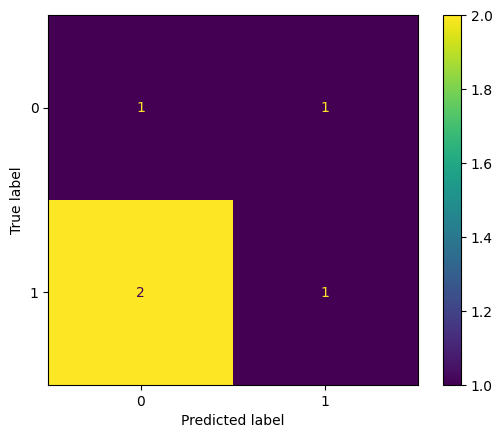

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def plot_conf_matrix():
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for x, y in val_loader:
            x, y = x.to(device), y.to(device)
            outputs = model(x)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(y.cpu().numpy())
    cm = confusion_matrix(all_labels, all_preds)
    ConfusionMatrixDisplay(cm).plot()
    plt.show()

plot_conf_matrix()

In [ ]:
import os
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, random_split
import torch.nn.functional as F

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
region_dirs = ["Brainstem", "Left_Caudate", "Left_Putamen", "Right_White_Matter"]

class MultiRegionDataset(Dataset):
    def __init__(self, root_dir):
        self.samples = []
        all_ids = set()
        for region in region_dirs:
            for file in os.listdir(os.path.join(root_dir, region)):
                subj_id = "_".join(file.split("_")[:-1])
                all_ids.add(subj_id)
        for subj_id in all_ids:
            paths = []
            label = None
            complete = True
            for region in region_dirs:
                path = os.path.join(root_dir, region, f"{subj_id}_0.npy")
                alt_path = os.path.join(root_dir, region, f"{subj_id}_1.npy")
                if os.path.exists(path):
                    paths.append(path)
                    label = 0
                elif os.path.exists(alt_path):
                    paths.append(alt_path)
                    label = 1
                else:
                    complete = False
            if complete:
                self.samples.append((paths, label))

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        paths, label = self.samples[idx]
        regions = [torch.tensor(np.load(p), dtype=torch.float32).unsqueeze(0) for p in paths]
        return torch.stack(regions), torch.tensor(label, dtype=torch.long)

class Simple3DCNN(nn.Module):
    def __init__(self):
        super(Simple3DCNN, self).__init__()
        self.conv1 = nn.Conv3d(1, 8, 3, padding=1)
        self.bn1 = nn.BatchNorm3d(8)
        self.pool = nn.MaxPool3d(2)

        self.conv2 = nn.Conv3d(8, 16, 3, padding=1)
        self.bn2 = nn.BatchNorm3d(16)

        # Ensure fixed size output using Adaptive pooling
        self.adaptive_pool = nn.AdaptiveAvgPool3d((2, 2, 2))  # Output shape: (B, 16, 2, 2, 2)

        self.fc1 = nn.Linear(16 * 2 * 2 * 2, 64)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(64, 32)
        self.out = nn.Linear(32, 2)

    def forward(self, x):
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = self.adaptive_pool(x)
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        return self.out(x)

class MultiRegionModel(nn.Module):
    def __init__(self):
        super(MultiRegionModel, self).__init__()
        self.region_models = nn.ModuleList([Simple3DCNN() for _ in range(4)])
        self.classifier = nn.Linear(64 * 4, 2)

    def forward(self, x):  # x shape: [B, 4, 1, D, H, W]
        outputs = []
        for i in range(4):
            out = self.region_models[i](x[:, i])  # Pass each region
            outputs.append(out)
        combined = torch.cat(outputs, dim=1)
        return self.classifier(combined)

# === Training Setup ===
root_dir = "/content/drive/MyDrive/extracted_regions1"
dataset = MultiRegionDataset(root_dir)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_ds, val_ds = random_split(dataset, [train_size, val_size])
train_loader = DataLoader(train_ds, batch_size=4, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=4)

model = MultiRegionModel().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# === Training ===
for epoch in range(1, 51):
    model.train()
    total_loss, correct = 0, 0
    for x, y in train_loader:
        x, y = x.to(device), y.to(device)
        optimizer.zero_grad()
        output = model(x)
        loss = criterion(output, y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        correct += (output.argmax(1) == y).sum().item()
    acc = correct / len(train_loader.dataset)
    print(f"Epoch {epoch}, Loss: {total_loss:.4f}, Accuracy: {acc:.4f}")

# === Validation (optional) ===
model.eval()
val_correct = 0
with torch.no_grad():
    for x, y in val_loader:
        x, y = x.to(device), y.to(device)
        output = model(x)
        val_correct += (output.argmax(1) == y).sum().item()
val_acc = val_correct / len(val_loader.dataset)
print(f"Validation Accuracy: {val_acc:.4f}")

RuntimeError: mat1 and mat2 shapes cannot be multiplied (4x8 and 256x2)

In [ ]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

# ------------------------------
# Step 1: Dataset Class
# ------------------------------
class BrainRegionDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.samples = []
        self.transform = transform
        self.region_dirs = ["Brainstem", "Left_Caudate", "Left_Putamen", "Right_White_Matter"]

        for region in self.region_dirs:
            region_path = os.path.join(root_dir, region)
            for fname in os.listdir(region_path):
                if fname.endswith('.npy'):
                    label = int(fname.split('_')[-1].split('.')[0])  # subject1_0.npy → 0
                    self.samples.append({
                        'path': os.path.join(region_path, fname),
                        'label': label
                    })

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        sample = self.samples[idx]
        data = np.load(sample['path'])
        data = torch.tensor(data, dtype=torch.float32).unsqueeze(0)  # shape: (1, D, H, W)
        label = torch.tensor(sample['label'], dtype=torch.long)
        return data, label

# ------------------------------
# Step 2: 3D CNN Model
# ------------------------------
class Improved3DCNN(nn.Module):
    def __init__(self):
        super(Improved3DCNN, self).__init__()
        self.conv1 = nn.Conv3d(1, 8, 3, padding=1)
        self.bn1 = nn.BatchNorm3d(8)
        self.pool = nn.MaxPool3d(2)

        self.conv2 = nn.Conv3d(8, 16, 3, padding=1)
        self.bn2 = nn.BatchNorm3d(16)

        self.adaptive_pool = nn.AdaptiveAvgPool3d((2, 2, 2))  # (B, 16, 2, 2, 2)

        self.fc1 = nn.Linear(16 * 2 * 2 * 2, 64)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(64, 32)
        self.out = nn.Linear(32, 2)

    def forward(self, x):
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = self.adaptive_pool(x)
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        return self.out(x)

# ------------------------------
# Step 3: Load Data
# ------------------------------
dataset = BrainRegionDataset("/content/drive/MyDrive/extracted_regions1")
train_idx, val_idx = train_test_split(np.arange(len(dataset)), test_size=0.2, random_state=42, stratify=[d[1].item() for d in dataset])
train_set = torch.utils.data.Subset(dataset, train_idx)
val_set = torch.utils.data.Subset(dataset, val_idx)

train_loader = DataLoader(train_set, batch_size=4, shuffle=True)
val_loader = DataLoader(val_set, batch_size=4)

# ------------------------------
# Step 4: Train Model
# ------------------------------
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = Improved3DCNN().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

for epoch in range(1, 51):
    model.train()
    running_loss, correct, total = 0.0, 0, 0
    for x, y in train_loader:
        x, y = x.to(device), y.to(device)
        optimizer.zero_grad()
        output = model(x)
        loss = criterion(output, y)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        preds = output.argmax(dim=1)
        correct += (preds == y).sum().item()
        total += y.size(0)

    acc = correct / total
    print(f"Epoch {epoch}, Loss: {running_loss:.4f}, Accuracy: {acc:.4f}")

# ------------------------------
# Step 5: Validate
# ------------------------------
model.eval()
correct, total = 0, 0
with torch.no_grad():
    for x, y in val_loader:
        x, y = x.to(device), y.to(device)
        output = model(x)
        preds = output.argmax(dim=1)
        correct += (preds == y).sum().item()
        total += y.size(0)

val_acc = correct / total
print(f"Validation Accuracy: {val_acc:.4f}")

Epoch 1, Loss: 12.1861, Accuracy: 0.4627
Epoch 2, Loss: 11.9777, Accuracy: 0.4478
Epoch 3, Loss: 11.7796, Accuracy: 0.5075
Epoch 4, Loss: 11.8154, Accuracy: 0.4776
Epoch 5, Loss: 11.5683, Accuracy: 0.5075
Epoch 6, Loss: 11.4611, Accuracy: 0.5522
Epoch 7, Loss: 11.7265, Accuracy: 0.6119
Epoch 8, Loss: 11.4777, Accuracy: 0.5672
Epoch 9, Loss: 11.0236, Accuracy: 0.6567
Epoch 10, Loss: 11.5959, Accuracy: 0.5821
Epoch 11, Loss: 11.6451, Accuracy: 0.5373
Epoch 12, Loss: 10.7084, Accuracy: 0.6269
Epoch 13, Loss: 10.1231, Accuracy: 0.7313
Epoch 14, Loss: 10.6875, Accuracy: 0.6269
Epoch 15, Loss: 11.9316, Accuracy: 0.5821
Epoch 16, Loss: 10.6909, Accuracy: 0.6716
Epoch 17, Loss: 11.2489, Accuracy: 0.6418
Epoch 18, Loss: 10.9609, Accuracy: 0.6418
Epoch 19, Loss: 10.8632, Accuracy: 0.6866
Epoch 20, Loss: 10.7234, Accuracy: 0.6418
Epoch 21, Loss: 11.7191, Accuracy: 0.5821
Epoch 22, Loss: 10.5977, Accuracy: 0.6119
Epoch 23, Loss: 10.8921, Accuracy: 0.6269
Epoch 24, Loss: 11.4914, Accuracy: 0.5970
E